# Reward Engineering

Visualization of Reward function on 2D surface: considering two spatial dimensions as variables for the vizualization

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_reward_1(pose, target_pos):
    distance = eucl_distance(pose, target_pos)
    reward = np.tanh(1 - 0.1*(distance))
    return reward

In [3]:
def get_reward_2(pose, target_pos):
    distance = eucl_distance(pose, target_pos)
    reward = np.tanh(2 - 0.2*(distance))
    return reward

In [13]:
def get_reward_3(pose, target_pos):
    distance = eucl_distance(pose, target_pos)
    reward_z = np.tanh(1 - 0.03*(abs(pose[1] - target_pos[1]))).sum()
    reward_x = np.tanh(1 - 0.03*(abs(pose[0] - target_pos[0]))).sum()
    reward = reward_z + reward_x
    return reward

In [5]:
def map_function(reward_function, x, y, target_pos):
    R = pd.DataFrame(np.zeros([len(x), len(y)]), index=y, columns=x)
    for xx in x:
        for yy in y:
            R[xx][yy] = reward_function([xx, yy], target_pos)
    return R

In [6]:
eucl_distance = lambda a, b: np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

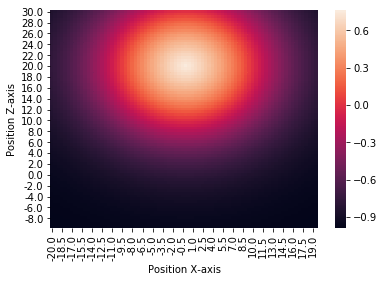

In [10]:
x_range = np.round(np.arange(-20.0,20,0.5), 2)
z_range = np.round(np.arange(30,-10,-0.5), 2)

target_pos = np.array([0, 20])

R = map_function(get_reward_1, x_range, z_range, target_pos)

ax = sns.heatmap(R)
ax.set_xlabel("Position X-axis")
ax.set_ylabel("Position Z-axis")
plt.show()

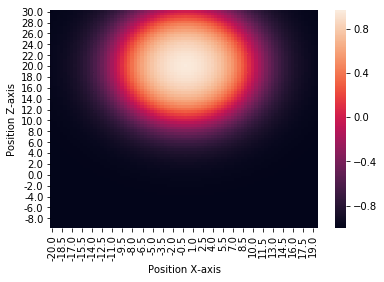

In [11]:
x_range = np.round(np.arange(-20.0,20,0.5), 2)
z_range = np.round(np.arange(30,-10,-0.5), 2)

target_pos = np.array([0, 20])

R = map_function(get_reward_2, x_range, z_range, target_pos)

ax = sns.heatmap(R)
ax.set_xlabel("Position X-axis")
ax.set_ylabel("Position Z-axis")
plt.show()

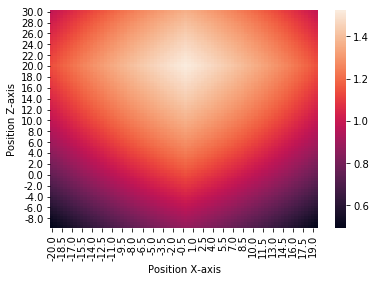

In [14]:
x_range = np.round(np.arange(-20.0,20,0.5), 2)
z_range = np.round(np.arange(30,-10,-0.5), 2)

target_pos = np.array([0, 20])

R = map_function(get_reward_3, x_range, z_range, target_pos)

ax = sns.heatmap(R)
ax.set_xlabel("Position X-axis")
ax.set_ylabel("Position Z-axis")
plt.show()